# Introduction to R
##### Statistical Consulting Center - University of North Carolina at Greensboro

In [10]:
# imprting all the packages needed in this document
# if using base libraries, there is no need to import it
# library(ragged2e)
library(IRdisplay)
library(repr)

# setting up size for images
options(repr.plot.width=4, repr.plot.height=3)

# setting working directory, to be easier to pull data files
setwd("~/R Workshop/DatanImg")

## 1. R Programming Basics
From <https://www.r-project.org/>

R is an integrated suite of software facilities for data manipulation, calculation and graphical display. It includes

- an effective data handling and storage facility
- a suite of operators for calculations on arrays, in particular matrices
- a large, coherent, integrated collection of intermediate tools for data analysis
- graphical facilities for data analysis and display
- a well-developed, simple and effective programming language which includes conditionals, loops, user-defined recursive  functions and in-out and out-out facilities.

The term "environment" is intended to characterize it as a fully-planned and coherent system, rather than an incremental accretion of very specific and inflexible tools, as is frequently the case with other data analysis software.

Many users think of R as a statistics system. We prefer to think of it as an environment within which statistical techniques are implemented. R can be extended via packages. There are about eight packages supplied with the R distribution and many more are available through the CRAN family of internet sites, covering a very wide range of "modern statistics".

In this workshop, we will learn the basics of using R for statistical analysis, including 

- Data file creation/acquisition

- Data manipulation

- Using supplied functions

- Simple data analyses and graphics 

**We will only scratch the surface!**

## 2. Setting up R

### 2.1 Installing R

The Base R and packages can be downloaded from the Comprehensive R Archive Network (CRAN) (<https://www.r-project.org/>).

When you run the program, you will see the R console:

![R Console](https://phonlab.sitehost.iu.edu/R/WebsiteImages/R%20upon%20open.PNG)

In [1]:
# The normal image in Markdown language did not work here, so we need this function from "IRdisplay" package to print the image
# display_png(file="RConsole.png") 

### 2.2 R coding and syntax
Commands are entered at the cursor (next to the ">"). Unlike some other software environments that require a complete set of commands (i.e., a "program") be executed to perform a task, R runs interactively, and executes each command as it is entered. (For those used to writing programs in SAS or SPSS, for example, this can take some time getting used to).    

For example, simple calculations can be executed:

In [26]:
2+5

[1] 7

In [15]:
log(7)

[1] 1.94591

If the result of a calculation is to be used in further calculations, then assign the result to an object. Notice that the result of the calculation is not shown. However, executing the object name shows the answer.

In [17]:
a <- 2+5

In [18]:
a

[1] 7

In [19]:
log.a<-log(a)

In [20]:
log.a

[1] 1.94591

Consider the following series of commands (we will discuss these in more details later).

In [22]:
Data <- c(2,5,8,9,9,10,11)
list(Data)

[[1]]
[1]  2  5  8  9  9 10 11

In [23]:
mean(Data)

[1] 7.714286

In [24]:
sd(Data)

[1] 3.147183

If you simply type the first command and hit enter, it seems nothing has happened as the cursor simply moves to the next line:

In [2]:
Data <- c(2,5,8,9,9,10,11)

However, a vector containing the six values inside the parentheses has been created. The next command shows the vector that was created:

In [3]:
Data

[1]  2  5  8  9  9 10 11

or

In [4]:
list(Data)

[[1]]
[1]  2  5  8  9  9 10 11

Finally, the **boxplot** function creates a boxplot of the data. <span style="color: gray;">(The plot opens in a new window when you use a basic R console)</span>

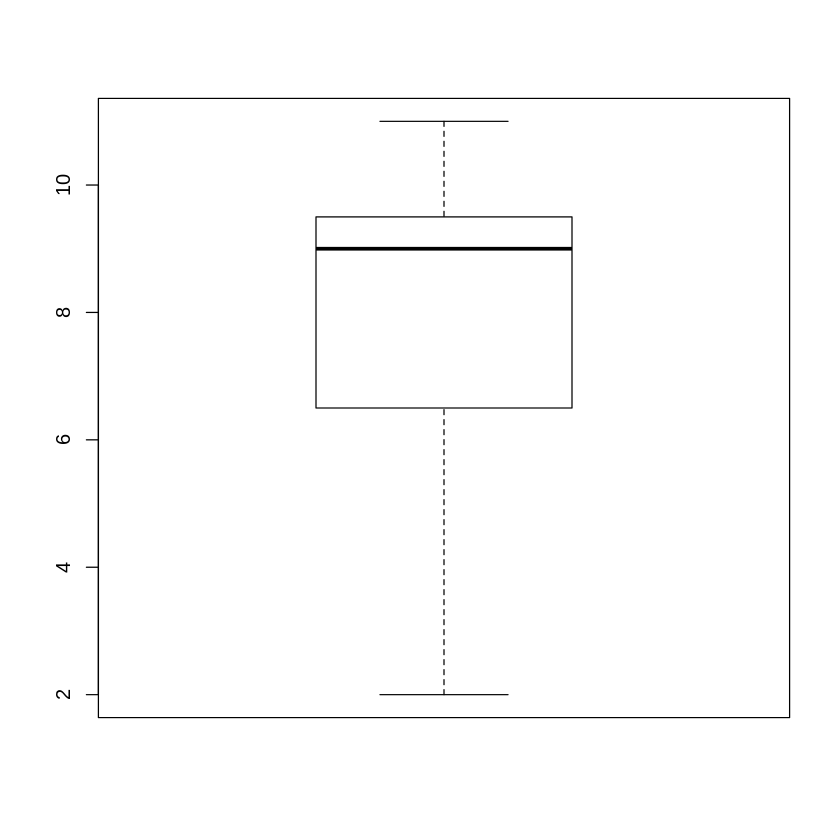

In [5]:
boxplot(Data)

Commands, object and variables names, functions and options are **case sensitive**. For example, recall that we created the object "Data" and executed the mean functions on it. Suppose we forgot that we capitalized the object name when we called the mean function:

In [12]:
Data <- c(2,5,8,9,9,10,11)
mean(data)

Warning message in mean.default(data):
“argument is not numeric or logical: returning NA”

[1] NA

Instead of the mean you will get *NA*, because there is no such object name "data".
Similarly, if you type list(data), instead of a list of the contents of the vector, we get a long, hard to decipher bunch of code that looks serious but is not particularly helpful to diagnose the cause of the problem. Thus, it bears repeating: **R is case sensitive**--it is a good idea to check for this first when things are not working as expected.

### 2.3 R interfaces

Because R is interactive and wants to execute commands each time the return key is hit, many users prefer to write blocks of code outside of the console, and then import or copy and paste the entire block to excite at once in the R console. There are several options for doing this:
1. Text editor: The simplest way to compose code is to use a text editor such as Notepad. The code can be saved as a file and then executed from inside the R console.

2. R editor: From the file menu inside R, choose either *New Script* to compose new code, or *Open Script* to open saved code.

3. RStudio: RStudio is a free workspace that includes a text editor window and the R console in the same window, and can also show graphics and results of executed commands. This may be the easiest way to use R and we will illustrate it's use in this workshop.  

Download RStudio from:
<https://www.rstudio.com/products/rstudio/download/>.  

Other interfaces designed for R are available, but we will not cover these in this workshop.

***
When you open RStudio, you will see something similar to the image below.
Here the console can be used as before, but with several enhancements:

- Environment/History window that shows all the active objects and command history
- A window with tabs that allows you to show all files and folders in your default workspace, see all plots created, list and install packages, and access help topics and documentation
- An Editor window in which syntax can be composed and executed (click on the upper right corner of the console window).

![R Studio](https://bookdown.org/gary_a_napier/induction_-_introduction_to_r/_book/images/Image2_Retry.png)

In [2]:
# display_png(file="RStudio.png") 

### 2.4 Reading data into R

In most situations, data will be stored in an external file that will need to be read into R. The **read.table** function is a general-purpose function for reading delimited text files. Suppose the data of the previous examples is contained in a text file called "datafile1.txt", arranged as below, with rows corresponding to observations:
```
2  
5   
8   
9   
9   
10
```
Then to create the data frame, use the command:
```
Data <- read.table(file="https://www.uncg.edu/mat/qms/datafile1.txt", header=F) 
Data
```
Notice that forward slashes(/) are used in R to separate folders, whereas Windows uses back-slashes.
```
Data=read.table(file="https://www.uncg.edu/mat/qms/datafile1.txt", header=F) 
Data
```
Now we may use functions to process the data. In the `read.table` function, the first argument is the specification of the location, `file=`, which is required. Next are two options, separated by commas. The first, `sep=""`, specifies the delimiter, which in this case is a space, while the second specifies that the first row of the file does not contain variable name. If the first row contains the name of the variable, then add the option `header=TRUE` (or `header=T`).
Note that all letters after the equal sign must be capitalized. Many other options can be specified in the `read.table` function (more on this later).

## 3. Statistical analysis using R

### 3.1 Our Working data set and results
We now consider a space-delimited data file containing several variables measured on students in an introductory statistics class.

Students in a statistics class at The University of Queensland participated in an experiment. First, the students measured their pulse rate. They were then asked to flip a coin. If the coin came up heads, they were to run in place for one minute, otherwise they sat for one minute. Next, everyone measured their pulse rate again. The pulse rates and other physiological and lifestyle variables are given in the data file. 
Five class groups between 1993 and 1998 participated in the experiment. After the first year, their arose a concern that some students chose the less strenuous option of sitting, even if their coin came up heads. Thus, in the years 1995-1998 a different method of random assignment was used: an equal number of students were randomly assigned to either running or sitting. In 1995 and 1998 not all of the forms were returned so the numbers running and sitting was still not entirely controlled.
***
**Variable  Description**

Height :     Height (cm)  
Weight :     Weight (kg)  
Age  :       Age (years)  
Gender  :    Sex (1 = M, 2 = F)  
Smokes :     Regular smoker? (1 = yes, 2 = no)  
Alcohol  :   Regular drinker? (1 = yes, 2 = no)  
Exercise :   Frequency of exercise (1 = high, 2 = moderate, 3 = low)  
Ran    :     Whether the student ran or sat between the first and second pulse measurements (1 = ran, 2 = sat)  
Pulse1  :    First pulse measurement (rate per minute)  
Pulse2 :     Second pulse measurement (rate per minute)  
Year   :     Year of class (93 - 98)
***
#### Reading the data file
The `read.table` function discussed earlier can be used to read the file, and the `head` function to display first 5 rows of the file:

In [1]:
Pulse <- read.table(file="https://www.uncg.edu/mat/qms/data.txt",header=T) 
head(Pulse,5)

Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
173,57,18,2,2,1,2,2,86,88,93
179,58,19,2,2,1,2,1,82,150,93
167,62,18,2,2,1,1,1,96,176,93
195,84,18,1,2,1,1,2,71,73,93
173,64,18,2,2,1,3,2,90,88,93


Another common type of delimited file is a comma-separated (csv) file. If the previous data file had been saved as a csv file, the `read.table` function can be modified as

`Pulse <- read.table(file="https://www.uncg.edu/mat/qms/data.txt", sep=",", header=T)`

or the function `read.csv` may be used

`Pulse <- read.csv(file="https://www.uncg.edu/mat/qms/data.txt", header=T)`

### 3.2 Research Questions
**1. What is the nature and strength of the association between Pulse1 (the first pulse measurement) and certain lifestyle and physiological measurements? Are frequent exercisers fitter?**

#### Explore the relationship between Pulse1 and Weight.

$(a)$ **Scatterplot of Pulse1 by Weight:** "The plot suggests a weak negative linear relation between
weight and the first pulse reading. There is also an outlying observation that could affect the
quantitative assessments of the association."

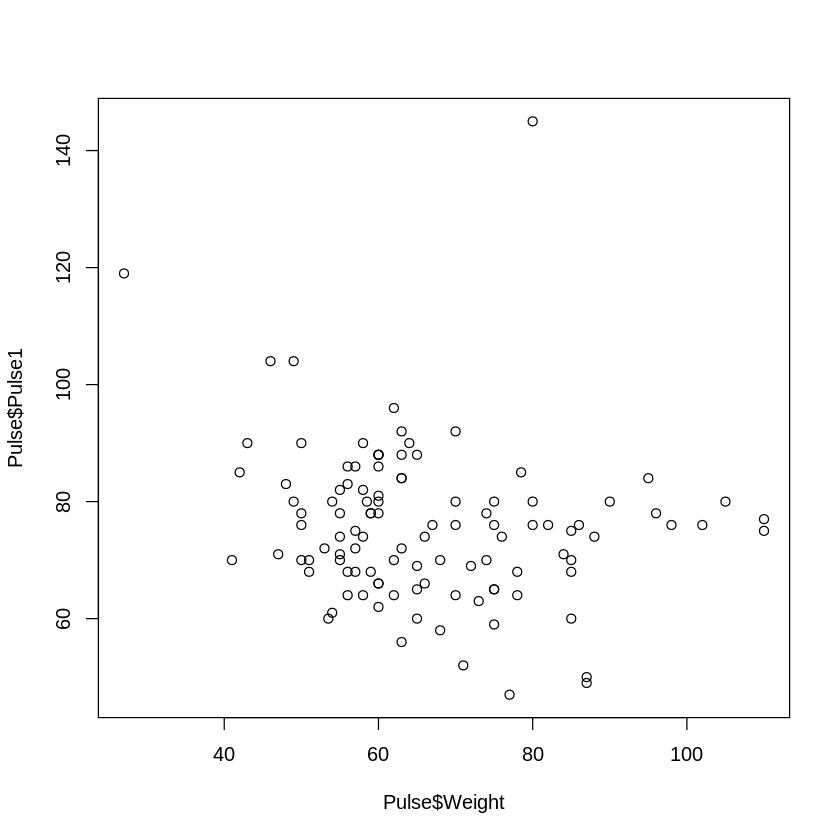

In [2]:
plot(Pulse$Pulse1~Pulse$Weight)


$(b)$ **Simple linear regression**. "Each additional pound of weight was associated with a 0.17 beat
per minute decrease in pulse"   

$(c)$ **Pearson correlation**. "The Pearson correlation between Pulse1 and Weight was r = -0.195,
which was statistically significant at the 0.05 level of significance t(df=107) = -2.05, p = 0.043)."


#### Explore the relationship between Pulse1 and smoking status.
$(a)$ **Boxplot** of Pulse1 by smoking status. "The boxplots suggest that there is little difference between typical first pulse measurements of smokers and nonsmokers, but that there is more variability among nonsmokers."  

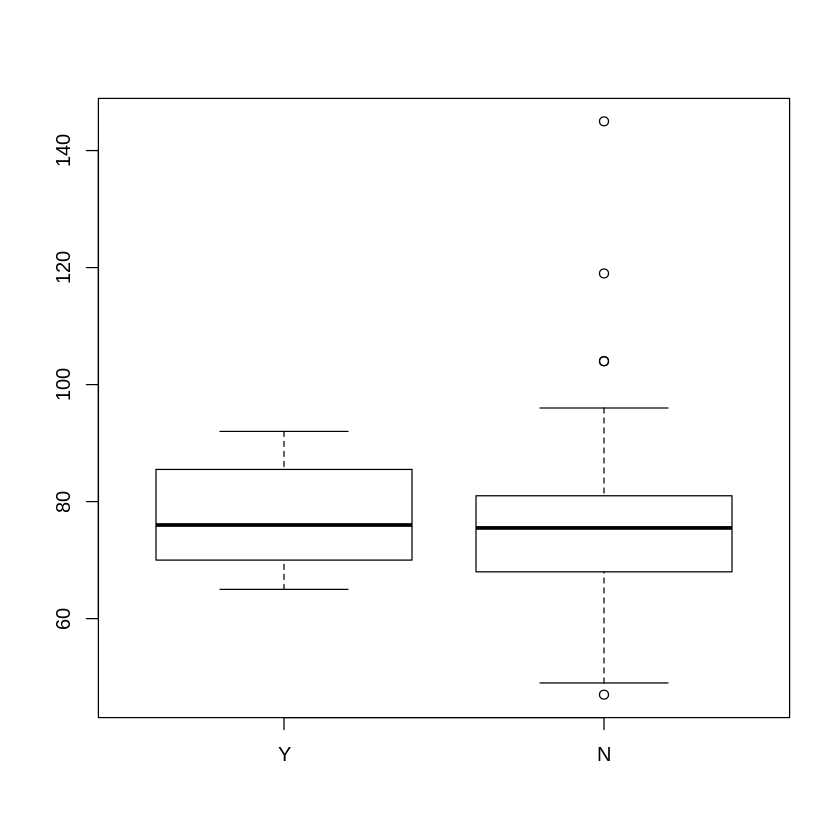

In [4]:
Pulse$Smokes.factor <- factor(Pulse$Smokes, levels=c(1,2), labels=c("Y", "N"))
boxplot(Pulse$Pulse1~Pulse$Smokes.factor,data=Pulse)

$(b)$ **Descriptives**. The mean pulse rate for smokers was 77.55 bpm and for nonsmokers 75.48 bpm.
$(c)$ **t-test.** The mean difference of 2.07 was not statistically significant t(df=107) = 0.49, p = 0.314)"
***
**2. Is there evidence that some students didn't run even though their coin toss came up heads?**  
\justifying
One way to answer this is to ask the question, "Is there evidence that fewer than 50% were selected to run?"

$(a)$ **Frequencies and proportions**. "Overall, 41.8% of all students ran between pulse readings."
\newline
\justifying
$(b)$ **Test for proportion**. "Assuming this groups of students can be considered a random sample from all similar statistics students, this is moderate, but not convincing statistical evidence that fewer than 50% of all students would be selected to run ($\chi^{2}$(1) $= 2.63$, $p = 0.053$). Thus, there is not convincing statistical evidence that students lied about the result of the coin toss.

#### Is the proportion that ran between measurements dependent on year?
\justifying
$(c)$ **Crosstabs, bar charts, chi-squared test**.
"The bar charts show a tendency for fewer students to run (except for 1996), but the discrepancy is greatest in 1993. When comparing 1993 to 1995-1998, 30.8% of students in 1993 admitted to obtaining heads compared to 45.2% in 1995-1998. However, this difference was not statistically significant ($\chi^{2}(1)=1.17$, $p = 0.28$).

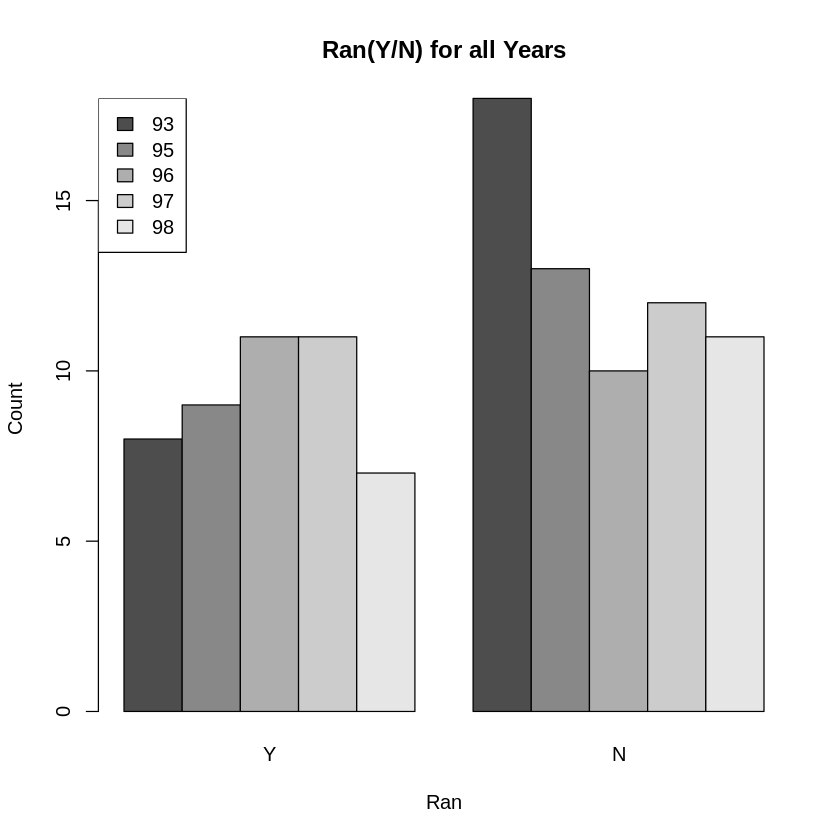

In [5]:
Pulse$Ran.factor <- factor(Pulse$Ran, levels=c(1,2),labels=c("Y", "N"))
Year.table<-table(Pulse$Year,Pulse$Ran.factor)
#colours <- c("red", "orange", "blue", "yellow", "green")
barplot(Year.table,xlab="Ran",ylab="Count",main="Ran(Y/N) for all Years",beside=TRUE,col=grey.colors(5))
legend("topleft",fill =grey.colors(5),legend=rownames(Year.table))

### 3.3 Using R to generate the results
Before we begin, it is important to check the data types of the variables, as sometimes the data type may not be what we expect (e.g., a numerical variable may be interpreted as a character or vice-versa). Thus we start by getting a summary of the variables and their types using the `str` function:

In [ ]:
str(Pulse)

Notice that the name of each column, along with the type of data and the first 10 observations are given. The variable *Gender* is listed as a factor. The rest are considered numeric.

The `summary` function, when applied to a data frame, will compute the mean and 5-number summary for all numeric variables and frequencies for factors or character variables:

In [ ]:
summary(Pulse)

Notice that there are several variables treated as numeric that are actually categorical variables, such as *Smokes*, which is an indicator for whether or not the individual smoked (1 indicates the person smoked). Since it does not make sense to compute numerical summaries on such a variable, we will need to let R know to treat these as categorical when necessary. 

We can also select individual variables to summarize. The code below chooses only the variable *Weight* to summarize:

In [ ]:
summary(Pulse$Weight)

###### How does Pulse1 (the first pulse measurement) depend on the lifestyle and physiological measurements? 

###### Explore the relationship between Pulse1 and Weight.

$(a)$ **Scatterplot** of Pulse1 by Weight. The `plot` function can be used. Two different ways of specifying the variables can be employed: 
(i) `plot(x,y)` or 
(ii) `plot(y~x)` (The latter is called a *formula* argument). Thus, to obtain scatterplot, use either:

In [ ]:
plot(Pulse$Pulse1 ~ Pulse$Weight)

In [ ]:
plot(Pulse$Weight, Pulse$Pulse1)

#### Explore the relationship between Pulse1 and Weight.
To help determine if a straight-line model would be a good approximation, a least squares regression line (details of **lm** function in next section) can be added to the plot:

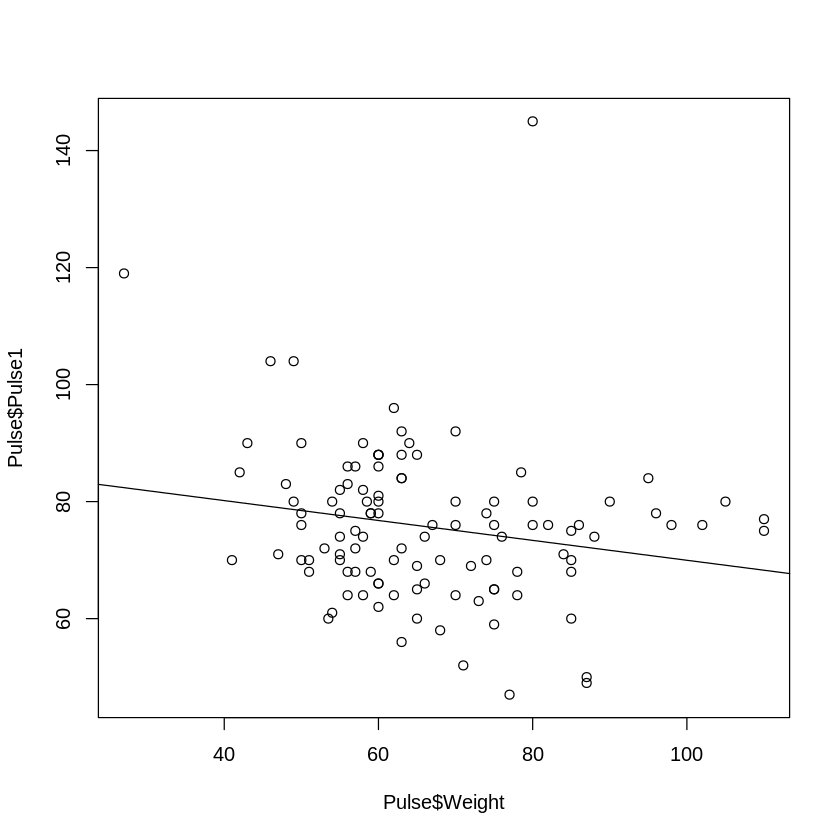

In [6]:
plot(Pulse$Pulse1 ~ Pulse$Weight )
abline(lm(Pulse$Pulse1 ~ Pulse$Weight))

In [7]:
lm(Pulse1~Weight, data=Pulse)


Call:
lm(formula = Pulse1 ~ Weight, data = Pulse)

Coefficients:
(Intercept)       Weight  
      86.97        -0.17  


In [ ]:
The previous code produced only the estimates of the slope and intercept of the regression line. However, if we create an object to store the results of the **lm** function, many additional results can be obtained. 

In [8]:
reg.fit<-lm(Pulse1~Weight, data=Pulse)
summary(reg.fit)


Call:
lm(formula = Pulse1 ~ Weight, data = Pulse)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.878  -9.218   0.422   6.733  71.632 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.96948    5.63684  15.429   <2e-16 ***
Weight      -0.17002    0.08282  -2.053   0.0425 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.1 on 107 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.03789,	Adjusted R-squared:  0.0289 
F-statistic: 4.214 on 1 and 107 DF,  p-value: 0.04252


In [9]:
anova(reg.fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Weight,1,723.691,723.6910,4.214444,0.04252075
Residuals,107,18373.703,171.7169,NA,NA


In [ ]:
Functions for generating residuals and fitted (or "predicted") values can also be used.

In [10]:
fitted(reg.fit)
residuals(reg.fit)

1        2        3        4        5        6        7        8 
77.27831 77.10829 76.42821 72.68776 76.08817 74.38796 77.27831 77.61835 
       9       10       11       12       13       14       15       16 
77.44833 76.76825 74.21794 77.10829 75.40809 76.93827 74.72800 68.26722 
      17       18       19       20       21       22       23       24 
77.44833 75.06804 77.44833 78.46846 76.76825 78.46846 77.61835 74.21794 
      25       26       27       28       29       30       31       32 
76.93827 74.38796 76.76825 76.76825 76.76825 77.44833 74.21794 72.51774 
      33       34       35       36       37       38       39       40 
77.27831 75.74813 75.91815 77.61835 71.66763 75.40809 76.25819 78.63848 
      41       42       43       44       45       46       47       48 
75.74813 76.25819 75.91815 76.76825 76.76825 79.14854 75.06804 72.51774 
      49       50       51       52       53       54       55       56 
76.76825 75.06804 79.99864 74.55798 74.21794 75.57811 76.25819 75.06804 
      57       58       59       60       61       62       63       64 
72.51774 78.29844 78.63848 74.21794 73.87790 72.17769 77.78837 69.62739 
      65       66       67       68       69       70       71       72 
76.42821 78.46846 77.27831 73.36784 70.30747 79.82862 72.17769 73.02780 
      73       74       75       77       78       79       80       81 
73.36784 78.80850 77.95839 77.87338 77.02328 78.29844 73.70788 76.93827 
      82       83       84       85       86       87       88       89 
74.89802 74.04792 68.26722 76.25819 69.11732 70.81753 72.00767 78.46846 
      90       91       92       93       94       95       96       97 
77.78837 73.62287 70.64751 72.34772 77.10829 77.10829 73.70788 75.91815 
      98       99      100      101      102      103      104      105 
76.42821 77.61835 76.76825 77.61835 76.25819 76.25819 73.36784 78.97852 
     106      107      108      109      110 
82.37893 79.65860 76.76825 75.91815 72.51774

1            2            3            4            5            6 
  8.72168829   4.89170887  19.57179117  -1.68775619  13.91183232   3.61203806 
           7            8            9           10           11           12 
 -9.27831171  -6.61835286  -9.44833228  11.23175002   1.78205864  -3.10829113 
          13           14           15           16           17           18 
 -5.40808538   1.06172944  -5.72800308   8.73277876 -13.44833228   4.93195577 
          19           20           21           22           23           24 
  5.55166772  -0.46845573  11.23175002  -8.46845573   0.38164714   5.78205864 
          25           26           27           28           29           30 
 -8.93827056  -4.38796194 -14.76824998   4.23175002   1.23175002   8.55166772 
          31           32           33           34           35           36 
-15.21794136  -4.51773561  -2.27831171  -1.74812653 -15.91814711  -7.61835286 
          37           38           39           40           41           42 
  8.33236726 -17.40808538   7.74181174  25.36152370  -9.74812653   7.74181174 
          43           44           45           46           47           48 
-10.91814711   3.23175002 -10.76824998  24.85146197   0.93195577  -2.51773561 
          49           50           51           52           53           54 
-10.76824998  16.93195577  -9.99864090 -11.55798251  -9.21794136   0.42189404 
          55           56           57           58           59           60 
-20.25818826 -11.06804423 -12.51773561 -10.29843515   1.36152370  -9.21794136 
          61           62           63           64           65           66 
-26.87790021 -22.17769446   2.21162657   6.37261416  -6.42820883  -2.46845573 
          67           68           69           70           71           72 
 -5.27831171   6.63216151   5.69253186   5.17137967 -23.17769446   2.97220266 
          73           74           75           77           78           79 
 71.63216151   4.19150312  -5.95839400 -17.87338372   2.97671916  -8.29843515 
          80           81           82           83           84           85 
 -5.70787964   1.06172944 -22.89802366  -0.04792079   6.73277876  -4.25818826 
          86           87           88           89           90           91 
 10.88267588  13.18247013   1.99232611  11.53154427 -16.78837343  11.37713065 
          92           93           94           95           96           97 
  7.35249071   3.65228496  12.89170887 -13.10829113  -9.70787964  12.08185289 
          98           99          100          101          102          103 
-12.42820883   4.38164714  11.23175002  -3.61835286  11.74181174  15.74181174 
         104          105          106          107          108          109 
  2.63216151  -7.97851745  36.62107105  10.34140025   9.23175002  -6.91814711 
         110 
  2.48226439

For anything other than a very small data set, outputting fitted values and residuals is not practical. However, plots containing these are sometimes of interest. For example, a histogram of residuals is useful for assessing the normality assumption.

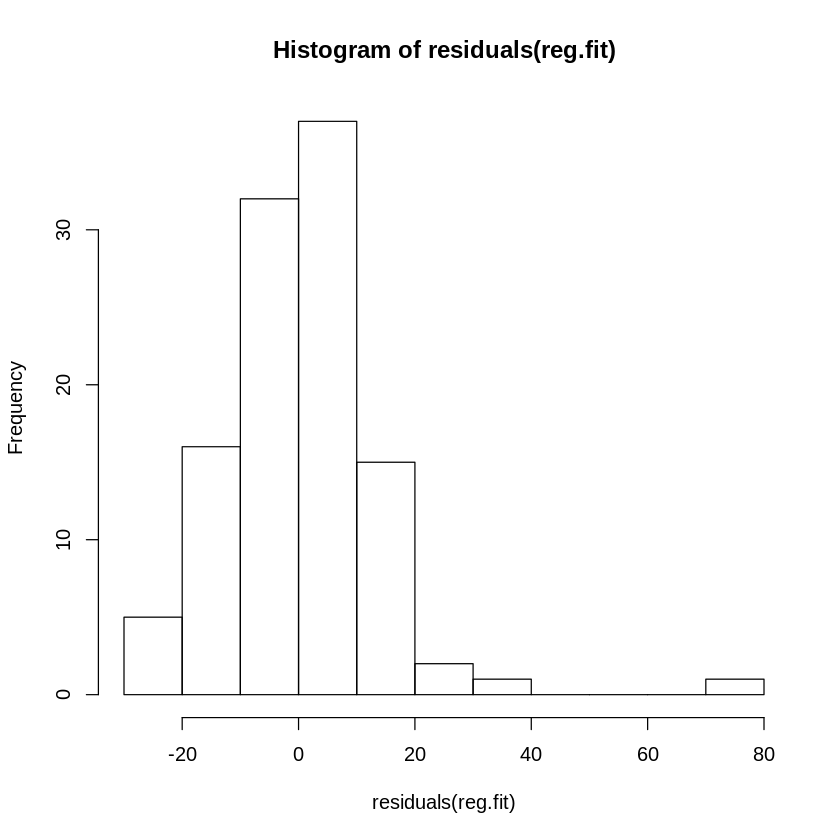

In [11]:
hist(residuals(reg.fit))

A scatterplot of residuals versus fitted values can be obtained in a similar fashion.

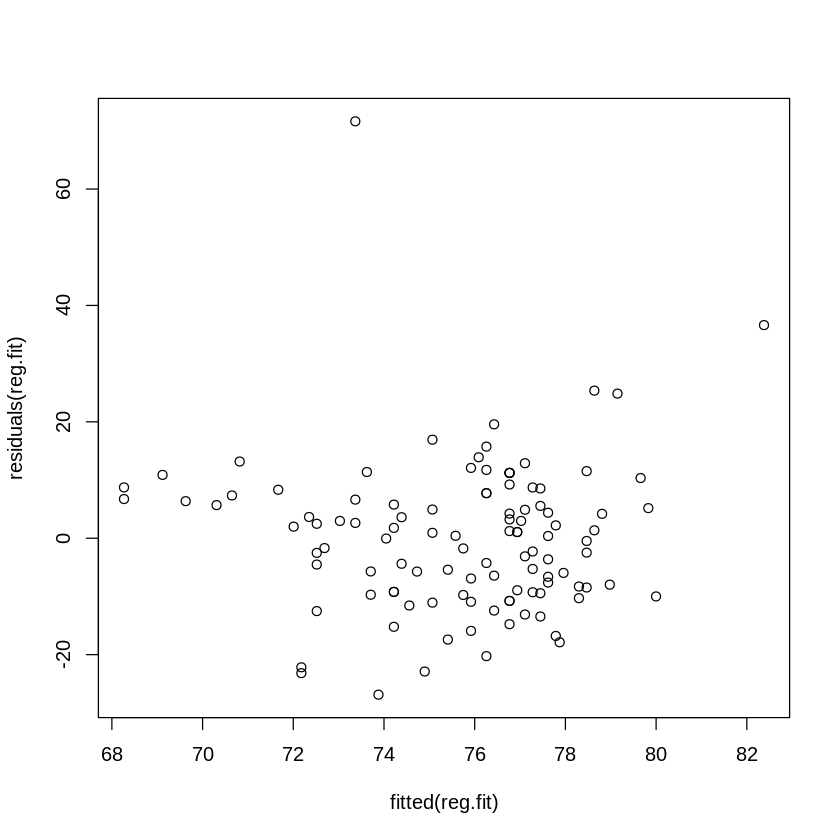

In [12]:
plot(fitted(reg.fit), residuals(reg.fit))

It might be helpful to assign the results of the `residual` and `fitted` functions to objects which can then be used in other functions.

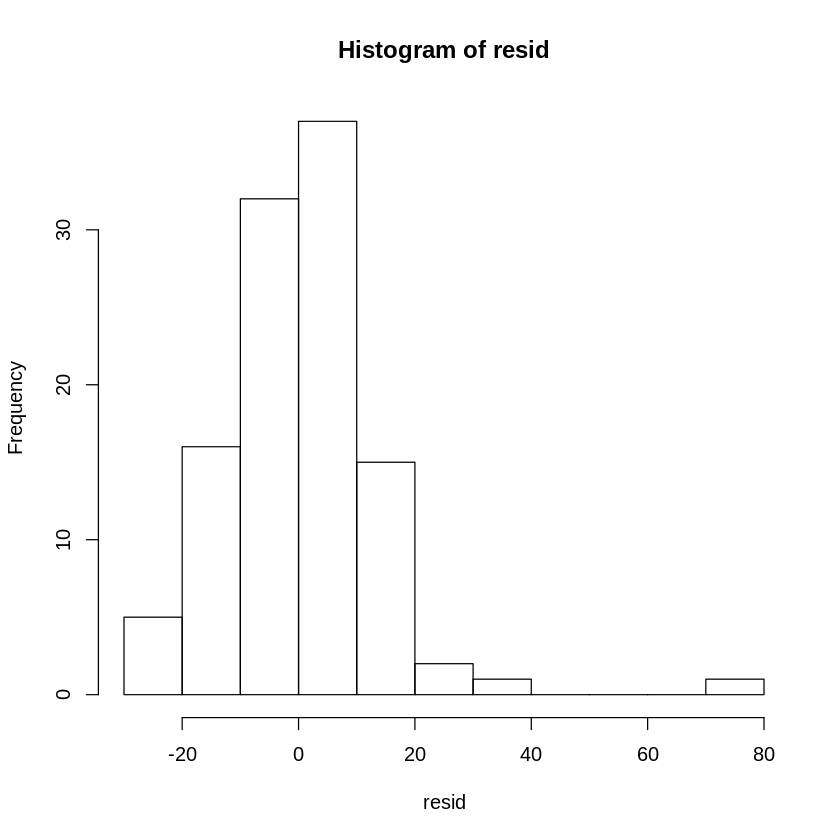

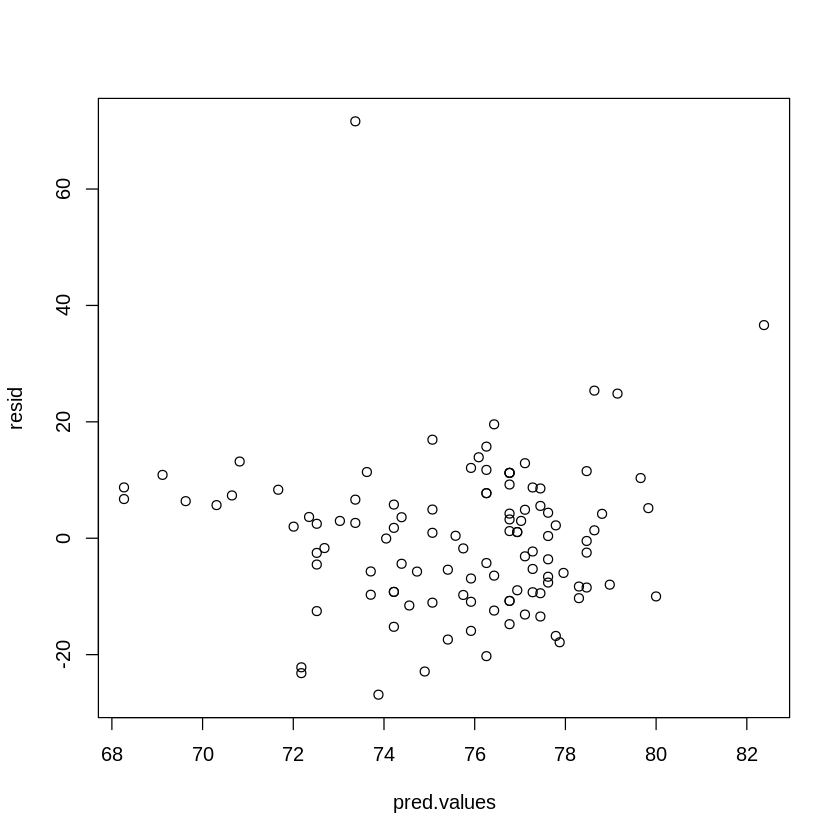

In [13]:
pred.values <- fitted(reg.fit)
resid <- residuals(reg.fit)
hist(resid)
plot(pred.values, resid)

$(c)$ **Pearson correlation:** The `cor` function will compute the correlation.

In [ ]:
cor(Pulse$Weight, Pulse$Pulse1)

Unfortunately, this did not appear to work, since the result is `NA`. What is the problem? If we look at the data, observation 76 has a missing value for *Pulse1*. How does the `cor` function handle missing data? Let's look at the documentation.

Executing either of the following commands will bring up the documentation on the **cor** function

 `help(cor)`
 
 `cor`


or by searching for `cor` in the Help tab in RStudio. The function syntax is given below.

`cor(x, y = NULL, use = "everything", method = c("pearson", "kendall", "spearman"))`

#
What does the `use = "everything"` argument do? 

In the "Arguments" section we find

> use -- an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings "everything", "all.obs", "complete.obs", "na.or.complete" or "pairwise.complete.obs"
        
***
In the "Details" section we find

>If use is "everything", NAs will propagate conceptually, i.e., a resulting value will be NA whenever one of its contributing observations is NA.  

>If use is "all.obs", then the presence of missing observations will produce an error. If use is "complete.obs" then missing values are handled by casewise deletion (and if there are no complete cases, that gives an error).   

> "na.or.complete" is the same unless there are no complete cases, that gives NA.  

> Finally, if use has the value "pairwise.complete.obs" then the correlation or covariance between each pair of variables is computed using all complete pairs of observations on those variables. This can result in covariance or correlation matrices which are not positive semi-definite, as well as NA entries if there are no complete pairs for that pair of variables. For cov and var, "pairwise.complete.obs" only works with the "pearson" method. Note that (the equivalent of) var(double(0), use = *) gives NA for use = "everything" and "na.or.complete", and gives an error in the other cases.  

Thus, by default, the `cor` function will only return a value if all pairs are nonmissing. In this case, we can fixed the problem by changing the **use** argument.

In [14]:
cor(Pulse$Pulse1,Pulse$Weight, use="pairwise.complete.obs")

[1] -0.1946657

Finally, the `cor.test` function will return a confidence interval and p-value for the test of nonzero correlation.

In [15]:
cor.test(Pulse$Pulse1, Pulse$Weight, use="pairwise.complete.obs")


	Pearson's product-moment correlation

data:  Pulse$Pulse1 and Pulse$Weight
t = -2.0529, df = 107, p-value = 0.04252
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.369246770 -0.006813511
sample estimates:
       cor 
-0.1946657 


#### Explore the relationship between the initial pulse measurement and smoking status.

(a) **Boxplot** of Pulse1 by smoking status. We want create two boxplots, one for smokers and one for nonsmokers. There are several ways to do this, and we will illustrate two. First, create individual boxplots for each *Smokes* category (smokers, nonsmokers). We do this by evaluating the Pulse1 variable only for observations where *Smokes* is at a single level.

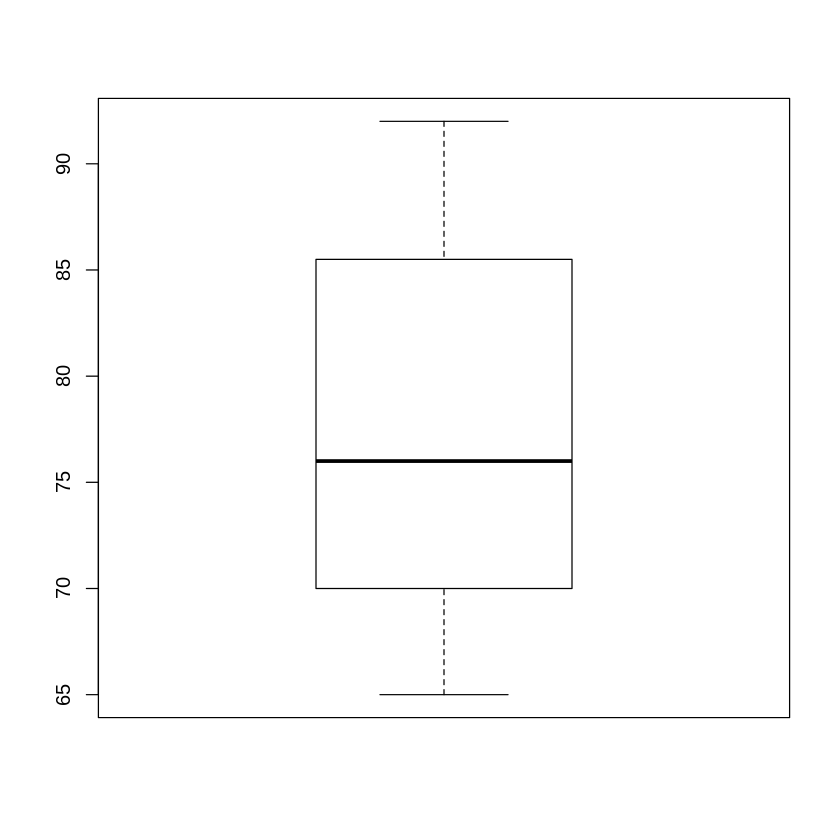

In [16]:
boxplot(Pulse$Pulse1[Pulse$Smokes==1])

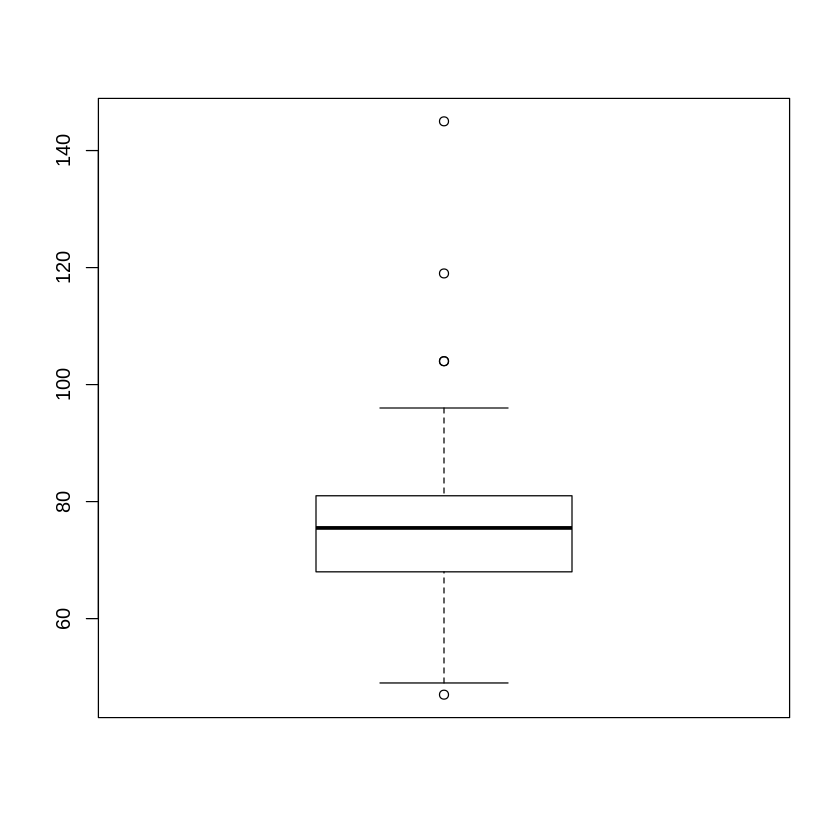

In [17]:
boxplot(Pulse$Pulse1[Pulse$Smokes==2])

Next, to get side-by-side plots in the same graph, we first show how to use the `factor()` function to create a new variable that transforms *Smokes* into a factor variable called Smokes.factor, and then use the function argument in the `boxplot()` function.

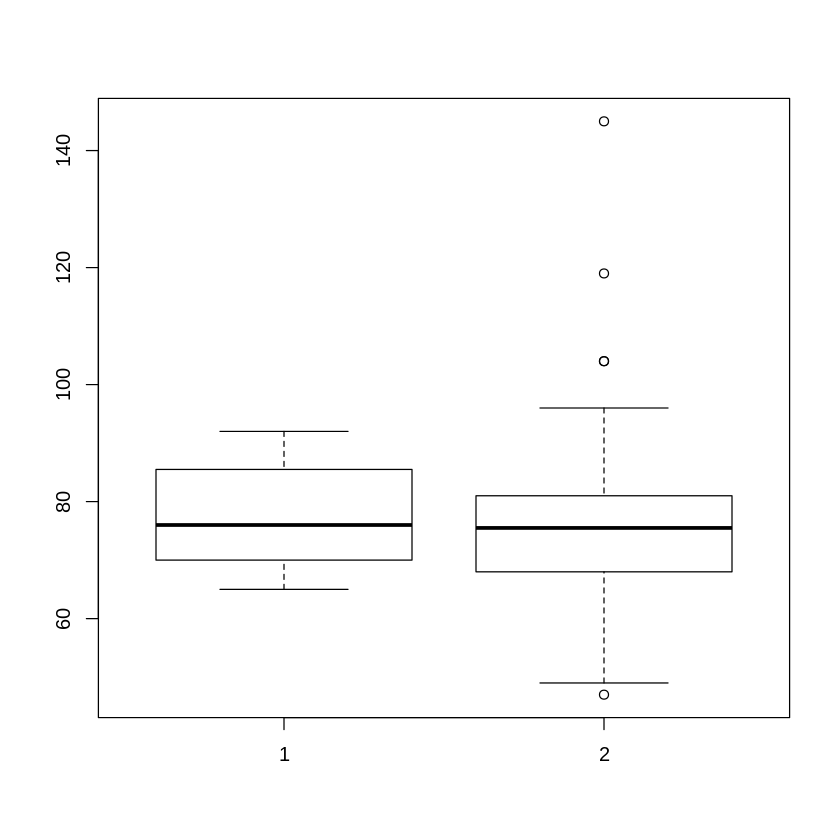

In [18]:
Pulse$Smokes.factor <- factor(Pulse$Smokes)
boxplot(Pulse1 ~ Smokes, data=Pulse)

While the factor function creates a new factor variable, it still uses the original values. Optional arguments can be added to create more descriptive labels:

In [19]:
Pulse$Smokes.factor <- factor(Pulse$Smokes,levels=c(1,2)
                              ,labels=c("Y","N"))

The boxplot will now use the newly defined labels.

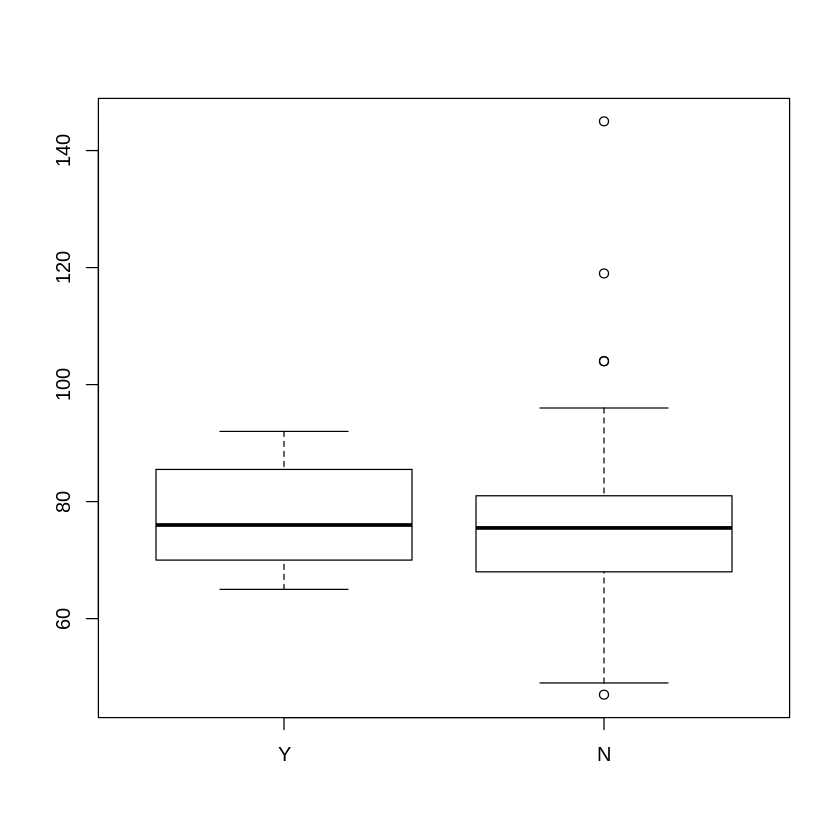

In [20]:
boxplot(Pulse$Pulse1 ~ Pulse$Smokes.factor)

(b) **Descriptives:** We will also want to compute descriptive measures, such as the mean and standard deviation of Pulse1 for each group.

In [21]:
mean(Pulse$Pulse1[Pulse$Smokes==1])
sd(Pulse$Pulse1[Pulse$Smokes==1])
mean(Pulse$Pulse1[Pulse$Smokes==2])
sd(Pulse$Pulse1[Pulse$Smokes==2])

[1] 77.54545

[1] 9.574588

[1] NA

[1] NA

Notice that we encounter a problem caused by the missing observation. We find in the documentation of the `mean` function:

`mean(x,trim=0,na.rm=FALSE, ...)`

`na.rm` - "a logical value indicating whether NA values should be stripped before the computation proceeds"

This suggests the following fix for the NonSmoker group:

In [22]:
mean(Pulse$Pulse1[Pulse$Smokes==2], na.rm=T)
sd(Pulse$Pulse1[Pulse$Smokes==2], na.rm=T)

[1] 75.47959

[1] 13.67459

As an alternative to calculating values for each category separately, a single call to the `tapply` function, using the Smokes.factor variable, will provide results as follows:
Notice we again use the `na.rm` argument,

In [23]:
tapply(Pulse$Pulse1,Pulse$Smokes.factor, FUN=mean, na.rm=T)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

Y        N 
77.54545 75.47959

(c) **t-test:**
The `t.test` function will compute a confidence interval for the mean difference and a *p*-value for a test of nonzero difference. We again employ the function argument to specify the variables

In [24]:
t.test(Pulse$Pulse1~Pulse$Smokes.factor)


	Welch Two Sample t-test

data:  Pulse$Pulse1 by Pulse$Smokes.factor
t = 0.64552, df = 15.022, p-value = 0.5283
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.754562  8.886287
sample estimates:
mean in group Y mean in group N 
       77.54545        75.47959 


By default, a two-sided *p*-value is reported, and equal population variances are not assumed (the Smith/Welch/Satterthwaite method).

The code below requests the pooled (equal variances assumed) and also requests a one-sided *p*-value:

In [26]:
t.test(Pulse$Pulse1 ~ Pulse$Smokes.factor, alternative = "greater"
       ,var.equal = T)


	Two Sample t-test

data:  Pulse$Pulse1 by Pulse$Smokes.factor
t = 0.48684, df = 107, p-value = 0.3137
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -4.974943       Inf
sample estimates:
mean in group Y mean in group N 
       77.54545        75.47959 


*Is there evidence that some students didn't run even though their coin toss came up heads?*

*Is there evidence that fewer than 50% would be selected to run?*


  **(a) Frequencies and proportions.**

\justifying
The `table` function computes frequencies and crosstabs. We first create a new factor variable for the Ran variable. It will be helpful to save the result of the `table()` function as an object:

In [27]:
Pulse$Ran.factor <- factor(Pulse$Ran, levels=c(1,2),
                           labels=c("Y", "N"))
ran.counts <- table(Pulse$Ran.factor)
ran.counts


 Y  N 
46 64 

The `prop.table()` function uses the object containing the counts to calculate proportions:

In [28]:
prop.table(ran.counts)


        Y         N 
0.4181818 0.5818182 

**(b) Test for proportion.**

The `prop.test()` function, which has arguments similar to `t.test()`, can be used to compute a confidence interval for the proportion of students that ran between measurements. The function takes as arguments the number of successes and the sample size, which are calculated using the `length()` and `sum()` functions:

In [29]:
n <- length(Pulse$Ran.factor)
success <- sum(Pulse$Ran.factor == "Y")
prop.test(success, n, alternative="less")


	1-sample proportions test with continuity correction

data:  success out of n, null probability 0.5
X-squared = 2.6273, df = 1, p-value = 0.05252
alternative hypothesis: true p is less than 0.5
95 percent confidence interval:
 0.0000000 0.5011424
sample estimates:
        p 
0.4181818 


*Does the proportion who ran between measurements depend on year?*


**(a) Crosstabs, bar charts, chi-squared test.**

The `table()` function can create crosstabulations for two or more variables. Here we calculate a 2-way table of Ran by Year:

In [30]:
Year.table<-table(Pulse$Year,Pulse$Ran.factor) 
Year.table

    
      Y  N
  93  8 18
  95  9 13
  96 11 10
  97 11 12
  98  7 11

As before, the `prop.table()` function can calculate proportions. For two-way tables, however, there are several different proportions possible for each cell, based on row, column or overall totals. The default is to divide counts by the overall sample size:

In [31]:
prop.table(Year.table)

    
              Y          N
  93 0.07272727 0.16363636
  95 0.08181818 0.11818182
  96 0.10000000 0.09090909
  97 0.10000000 0.10909091
  98 0.06363636 0.10000000

To obtain marginal proportions, we can specify the `margin=` argument, where `1` requests row marginals (divide counts by row totals) and `2` column marginals (divide counts by column totals). For the purposes of the research question, dividing counts by Year totals would be most useful.

Since Year was listed first in the `table()` function, it will be treated by R as the row variable, as thus the code below requests row marginal proportions:

In [32]:
prop.table(Year.table,margin=1)

    
             Y         N
  93 0.3076923 0.6923077
  95 0.4090909 0.5909091
  96 0.5238095 0.4761905
  97 0.4782609 0.5217391
  98 0.3888889 0.6111111

**_Test for independence_**

The `chisq.test()` function will compute a test for independence of Ran.factor and Year:

In [33]:
chisq.test(Year.table)


	Pearson's Chi-squared test

data:  Year.table
X-squared = 2.6797, df = 4, p-value = 0.6128


**_Plots_**

Bar charts can be useful for displaying categorical data. We first illustrate the `barplot` function for Ran.factor for just 1993.

In [34]:
Year93.table<-table(Pulse$Year[Pulse$Year==93],Pulse$Ran.factor[Pulse$Year==93])
Year93.table

    
      Y  N
  93  8 18

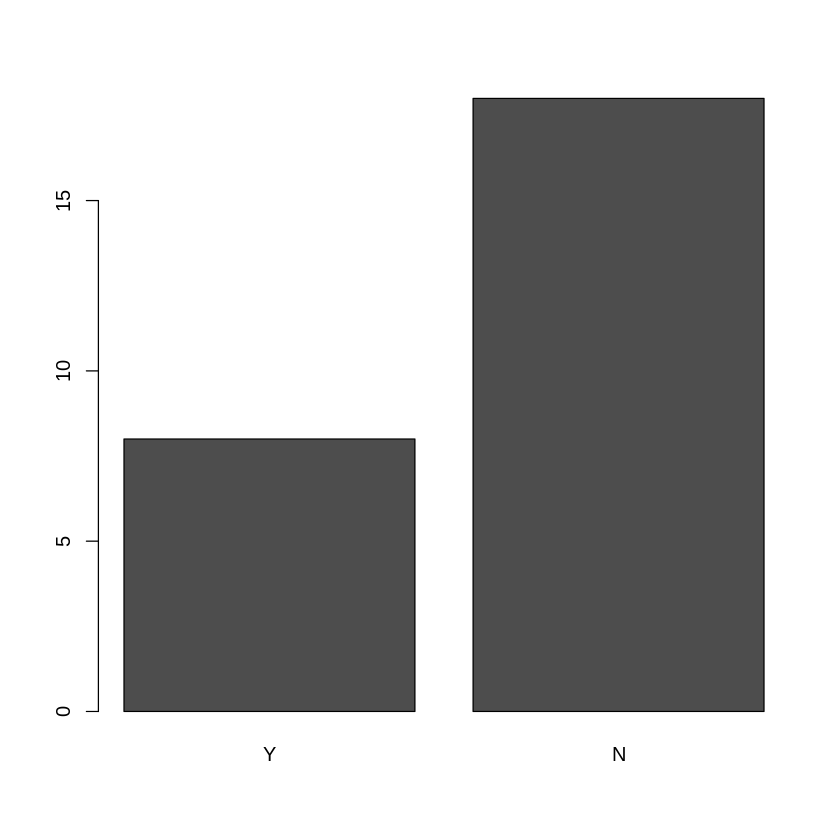

In [35]:
barplot(Year93.table)

**_Side-by-side plots_**

Next, side-by-side plots comparing all years are created.

    
      Y  N
  93  8 18
  95  9 13
  96 11 10
  97 11 12
  98  7 11

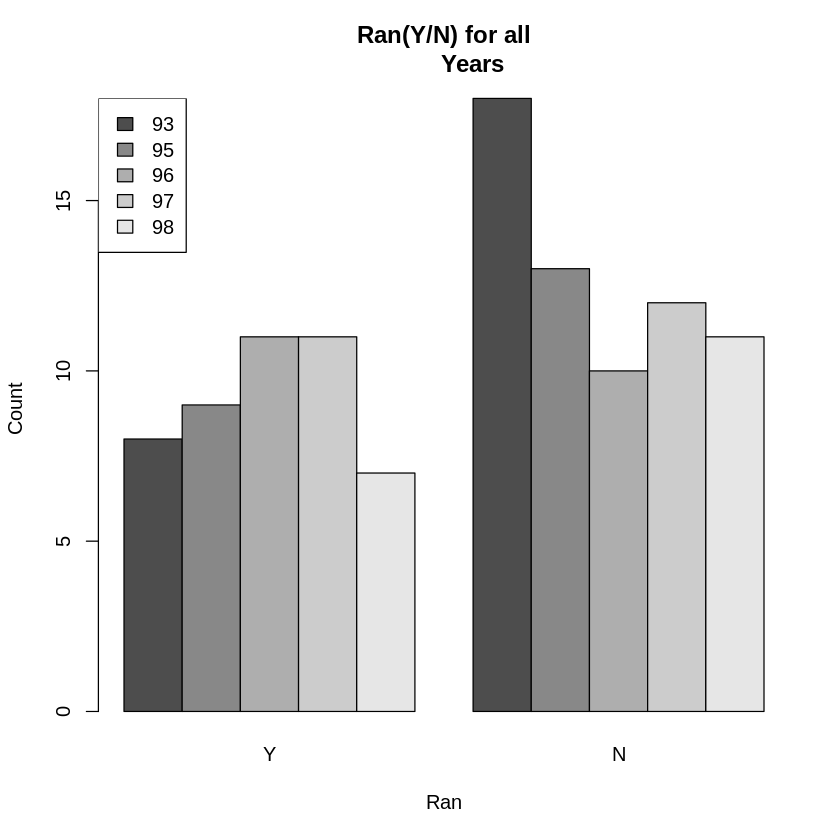

In [38]:
Year.table<-table(Pulse$Year,Pulse$Ran.factor)
Year.table
#r,fig.align="center",size="tiny",strip.white=TRUE,echo=TRUE
barplot(Year.table,xlab="Ran",ylab="Count",main="Ran(Y/N) for all
        Years",beside=TRUE,col=grey.colors(5))
legend("topleft",fill =grey.colors(5),legend=rownames(Year.table))

We will create a new categorical variable for Year 93 using the function `ifelse()` then will create a new table to compare year 1993 with other years versus Ran.factor,

In [39]:
Pulse$Year.93 <- ifelse(Pulse$Year==93, 93, "other")
Year.table.93 <-table(Pulse$Year.93, Pulse$Ran.factor)
Year.table.93

       
         Y  N
  93     8 18
  other 38 46

**_Test for independence_**

Finally, the `chisq.test()` function will compute a test for independence of Ran.factor and **Year.93**:

In [40]:
chisq.test(Year.table.93)


	Pearson's Chi-squared test with Yates' continuity correction

data:  Year.table.93
X-squared = 1.1654, df = 1, p-value = 0.2803


**_Installing packages_**

While we were able to perform the desired analyses using the packages included in the Base install of R, it was somewhat tedious. There are many additional *packages* with functions tailored to specific types of analyses. For instance, the `CrossTabs` function in the `gmodels` package has the ability to do all of the analyses in this section (and more) in a single step.
The `install.packages` function can be used to download the required package from CRAN and install the package locally. (Alternatively, choose "Install" within the "Package" tab in RStudio.) We will then have to make the package available using the `library` function.

* First, install `gmodels`. 

`install.packages("gmodels")`

Note: You only need to do this one time.

Then use the `library` function to make the package available for the current R session.

In [42]:
library(gmodels)

also installing the dependencies ‘gtools’, ‘gdata’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Once the `library` function is executed, any documentation associated with the `gmodels` package will be available. Searching for help as before on the `CrossTable` function reveals the following information.

```
CrossTable(x, y, digits = 3, max.width = 5, expected = FALSE,prop.r = TRUE, prop.c = TRUE, prop.t = TRUE,  prop.chisq = TRUE, chisq = FALSE, fisher = FALSE,
           mcnemar = FALSE, resid = FALSE, sresid = FALSE,asresid = FALSE, missing.include = FALSE,format = c("SAS", "SPSS"), dnn = NULL, ...)
```

Let's use `Crosstable` to try to create the previous results.

In [43]:
CrossTable(Pulse$Year, Pulse$Ran, prop.t = T, 
           prop.c = F,	prop.chisq = F, chisq = T)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  110 

 
             | Pulse$Ran 
  Pulse$Year |         1 |         2 | Row Total | 
-------------|-----------|-----------|-----------|
          93 |         8 |        18 |        26 | 
             |     0.308 |     0.692 |     0.236 | 
             |     0.073 |     0.164 |           | 
-------------|-----------|-----------|-----------|
          95 |         9 |        13 |        22 | 
             |     0.409 |     0.591 |     0.200 | 
             |     0.082 |     0.118 |           | 
-------------|-----------|-----------|-----------|
          96 |        11 |        10 |        21 | 
             |     0.524 |     0.476 |     0.191 | 
             |     0.100 |     0.091 |           | 
-------------|-----------|-----------|-----------|
          97 |        11 |        12 |        23 

**_CrossTable_**

In [44]:
CrossTable(Pulse$Year.93, Pulse$Ran, prop.t = T, 
           prop.c = F,	prop.chisq = F, chisq = T)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  110 

 
              | Pulse$Ran 
Pulse$Year.93 |         1 |         2 | Row Total | 
--------------|-----------|-----------|-----------|
           93 |         8 |        18 |        26 | 
              |     0.308 |     0.692 |     0.236 | 
              |     0.073 |     0.164 |           | 
--------------|-----------|-----------|-----------|
        other |        38 |        46 |        84 | 
              |     0.452 |     0.548 |     0.764 | 
              |     0.345 |     0.418 |           | 
--------------|-----------|-----------|-----------|
 Column Total |        46 |        64 |       110 | 
--------------|-----------|-----------|-----------|

 
Statistics for All Table Factors


Pearson's Chi-squared test 
------------------------------------------------------------
Chi^2 =  1.70

# You can also try something else by yourselves

You can click the `+` button on the menu bar to add more cells and start typing.